<a href="https://colab.research.google.com/github/wesamkiwan/california_housing_prices_linearregression/blob/main/Housing_pricing_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset01=pd.read_csv("/content/drive/MyDrive/my_kaggel_DS/california_housing_prices/housing.csv")

In [ ]:
dataset01
#dataset02

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
dataset01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## when we have missing values we have to find a way to process them. Sometimes when the number of the missing values is very small we may drop them out of the dataset.

In [ ]:
dataset01.dropna(inplace=True)       #this will drop the NAN values and update the dataset (inplace=True)

In [ ]:
dataset01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## split the dataset into training dataset and test dataset (but first spliting the datasets into X's and Y's)
[P.S. spliting data to x and y must be done at the end after feature engineering step, so we will split the data into x and y once again later]

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

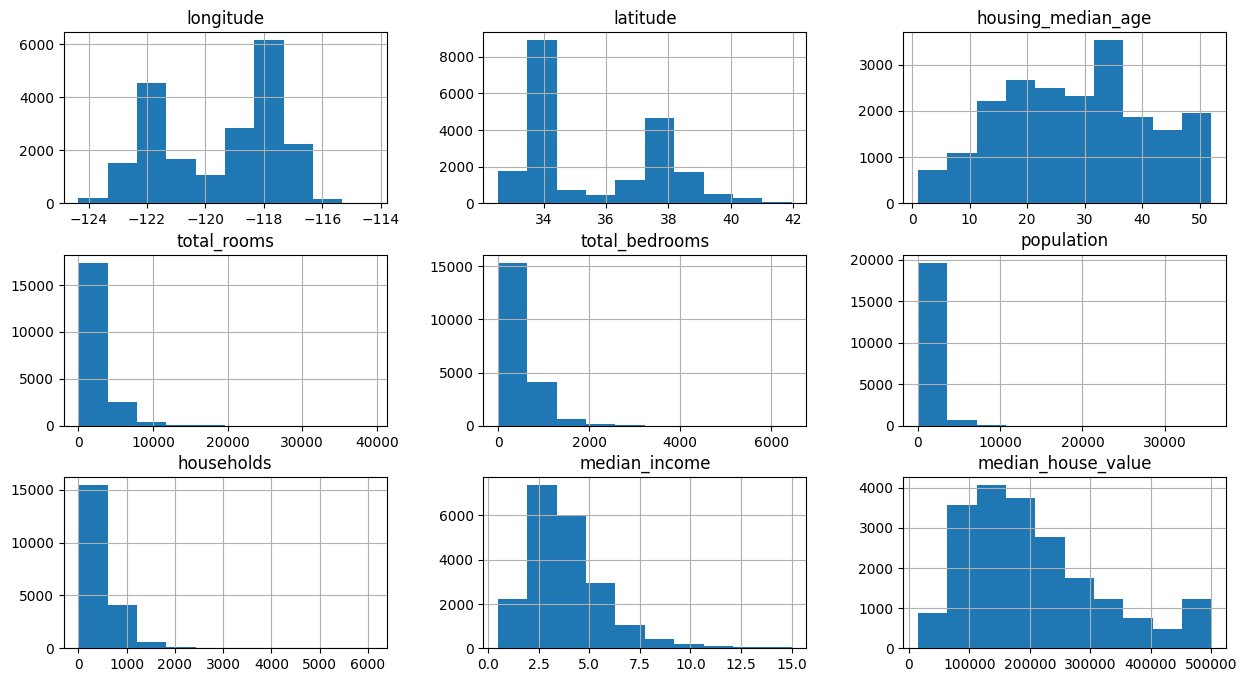

In [ ]:
#visualize the distribution of each feature
dataset01.hist(figsize=(15,8))

<ipython-input-10-84679cb8ef5f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset01.corr(), annot=True, cmap="YlGnBu")


<Axes: >

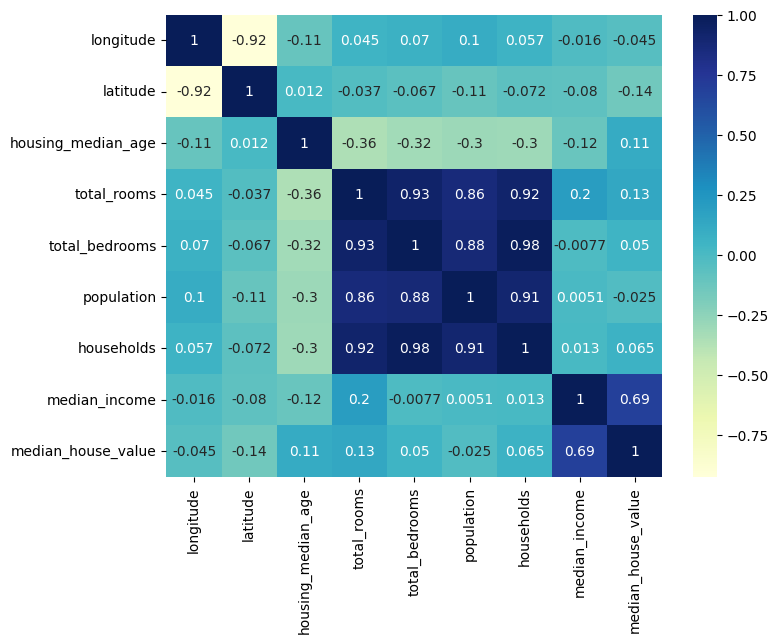

In [ ]:
#visualize the correlation between all the features
plt.figure(figsize=(8,6))
sns.heatmap(dataset01.corr(), annot=True, cmap="YlGnBu")

Notice that the distribution diagrams for total_rooms, total_bedrooms, population and households are skewed. these parts of data need to be preprocessed.
(taking the logarithms of these features can help to get the normal distribution shape)
This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

In [ ]:
#adding 1 to the feature value helps to prevent 0 values
dataset01["total_rooms"]=np.log(dataset01["total_rooms"]+1)
dataset01["total_bedrooms"]=np.log(dataset01["total_bedrooms"]+1)
dataset01["population"]=np.log(dataset01["population"]+1)
dataset01["households"]=np.log(dataset01["households"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

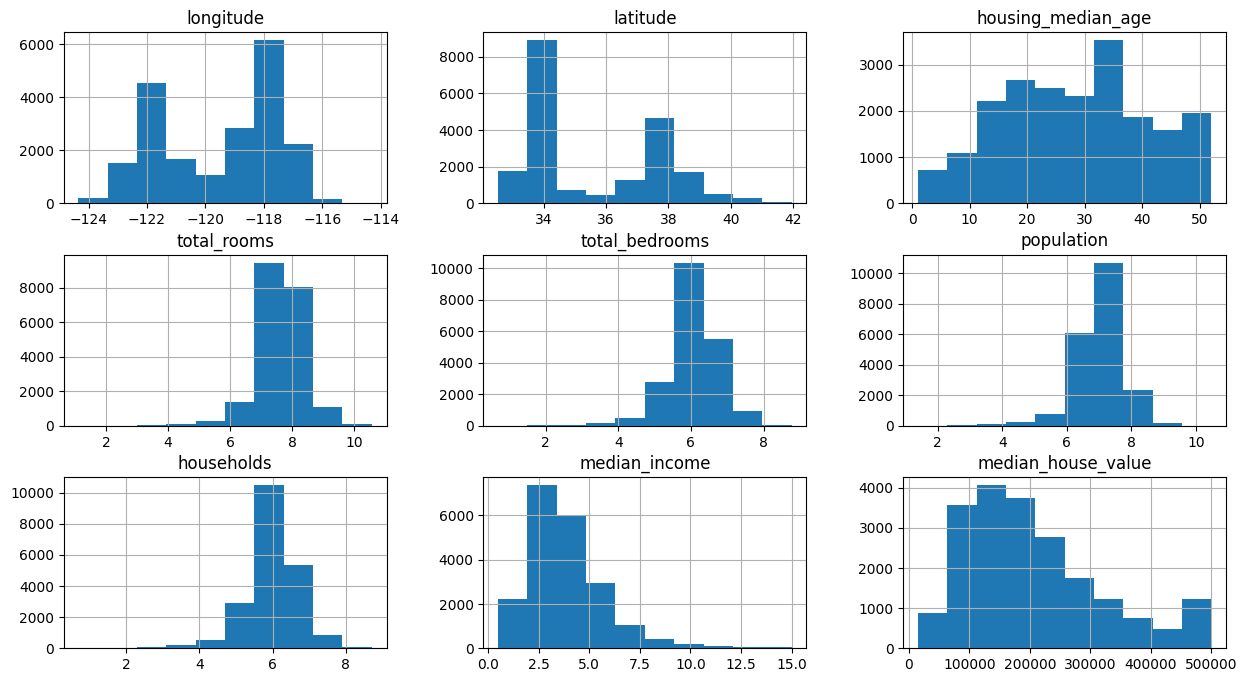

In [ ]:
dataset01.hist(figsize=(15,8))

now the feature "ocean_proximity" is relevant to our problem but it is a categorial feature, so to make it readable to the model we need to convert it to numerical values.
the best way in this case is to split this feature to multiple columns one column for each category and giving it the value 0 or 1. (this kind of features is called binary features)

In [ ]:
dataset01.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
pd.get_dummies(dataset01.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
dataset01=dataset01.join(pd.get_dummies(dataset01.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [ ]:
dataset01

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


<Axes: >

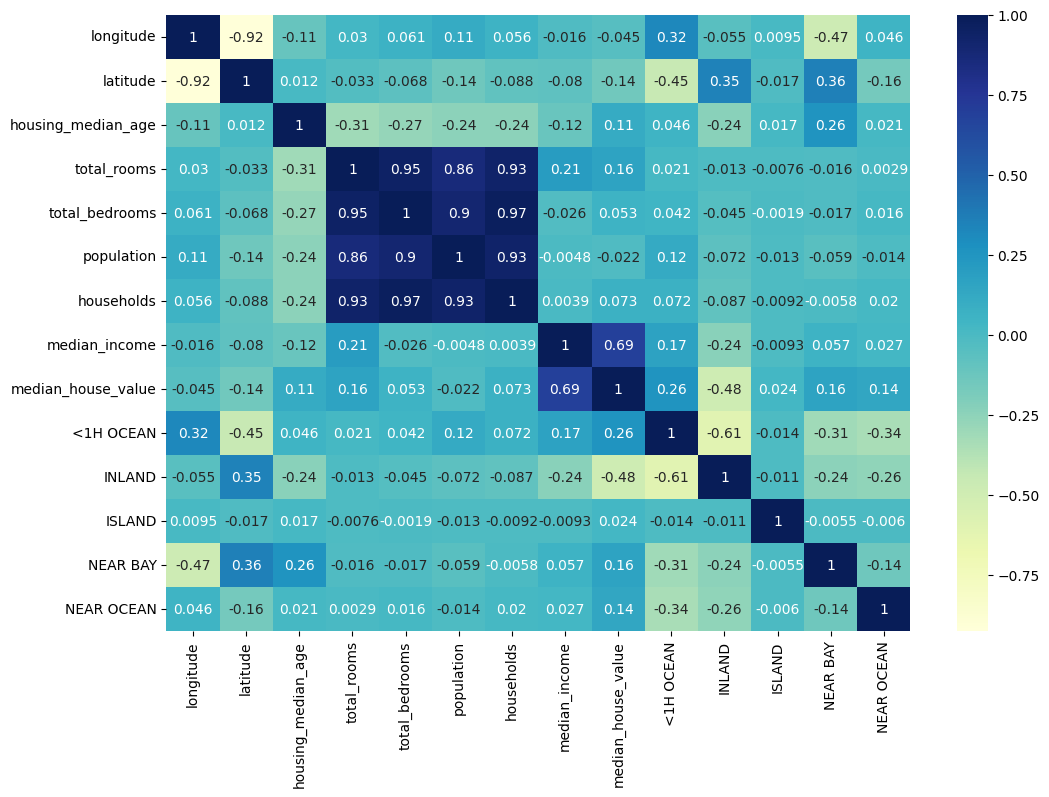

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset01.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

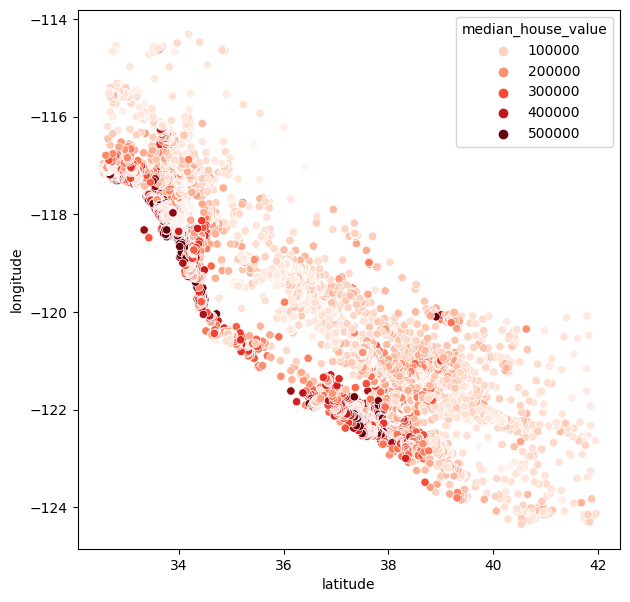

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="latitude", y="longitude", data=dataset01, hue="median_house_value", palette="Reds")

## Features Engineering of some new features

In [ ]:
dataset01["bedrooms_ratio"]=dataset01["total_bedrooms"]/dataset01["total_rooms"]
dataset01["room_per_person"]=dataset01["total_rooms"]/dataset01["population"]

<Axes: >

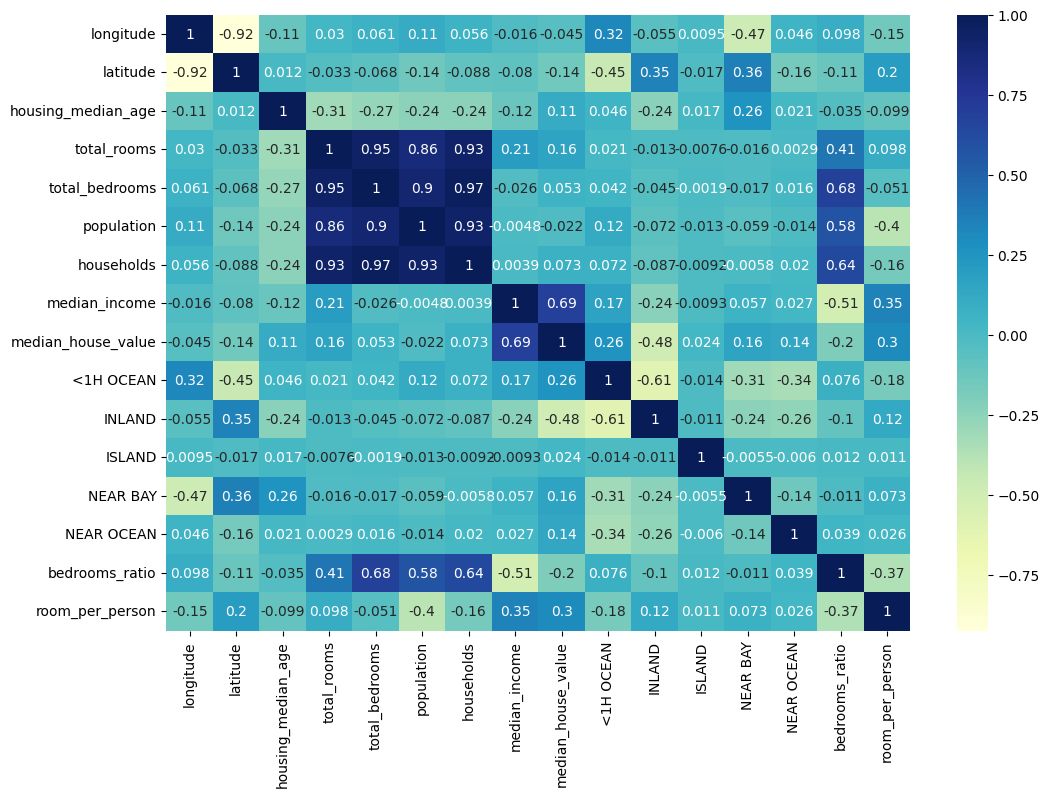

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset01.corr(), annot=True, cmap="YlGnBu")

# **now we need to split the dataset into Training dataset and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#set x & y value sets
x=dataset01.drop(["median_house_value"], axis=1)
y=dataset01["median_house_value"]

In [ ]:
#split the data into training dataset and testing dataset (the size of test dataset is set to be 20% of the whole dataset)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
#reassemble the training dataset
train_data01=x_train.join(y_train)

In [ ]:
train_data01

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,room_per_person,median_house_value
13442,-117.43,34.09,18.0,8.062433,6.450470,7.391415,6.352629,2.7437,0,1,0,0,0,0.800065,1.090783,120200.0
19142,-122.69,38.32,15.0,7.838738,6.028279,7.244942,6.056784,5.6613,1,0,0,0,0,0.769037,1.081960,172400.0
13376,-117.59,34.16,10.0,9.155673,7.074963,8.248006,7.023759,7.8252,0,1,0,0,0,0.772741,1.110047,361400.0
12542,-121.49,38.54,47.0,7.746733,6.285998,6.659294,6.093570,2.5639,0,1,0,0,0,0.811439,1.163296,123000.0
19721,-121.91,39.14,45.0,6.740519,5.049856,5.840642,4.919981,2.1250,0,1,0,0,0,0.749179,1.154072,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,-117.88,33.65,24.0,8.492900,6.629363,7.483244,6.626718,5.9055,1,0,0,0,0,0.780577,1.134922,477300.0
8512,-118.31,33.89,37.0,7.731492,6.232448,7.137278,6.212606,3.7639,1,0,0,0,0,0.806112,1.083255,220600.0
11264,-117.98,33.80,35.0,7.656810,5.834811,6.982863,5.840642,5.4876,1,0,0,0,0,0.762042,1.096514,227500.0
772,-122.10,37.66,36.0,7.174724,5.420535,6.645091,5.459586,4.2750,0,0,0,1,0,0.755504,1.079703,185300.0


In [ ]:
test_data01=x_test.join(y_test)

In [ ]:
test_data01

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,room_per_person,median_house_value
5928,-117.80,34.10,13.0,8.005367,6.206576,7.080026,6.142037,6.2456,0,1,0,0,0,0.775302,1.130697,161700.0
6307,-117.87,33.99,21.0,7.950855,6.246107,7.616776,6.320768,4.9271,1,0,0,0,0,0.785589,1.043861,209700.0
5224,-118.25,33.95,25.0,6.639876,5.303305,6.687109,5.398163,1.1384,1,0,0,0,0,0.798705,0.992937,100000.0
3698,-118.38,34.21,38.0,7.218177,5.981414,7.494986,6.006353,2.3182,1,0,0,0,0,0.828660,0.963067,171200.0
4700,-118.38,34.07,21.0,8.203578,6.863803,7.320527,6.792344,3.5573,1,0,0,0,0,0.836684,1.120627,500001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7533,-118.22,33.91,31.0,6.349139,5.036953,6.735780,5.068904,2.6154,1,0,0,0,0,0.793328,0.942599,89200.0
16945,-122.32,37.55,44.0,7.674153,6.021023,6.745236,5.916202,4.4583,0,0,0,0,1,0.784585,1.137714,397100.0
11021,-117.83,33.83,13.0,8.232174,6.194405,7.311218,6.214608,8.3818,1,0,0,0,0,0.752463,1.125965,377600.0
8912,-118.49,34.02,30.0,7.638198,6.533789,6.934397,6.385194,3.1635,1,0,0,0,0,0.855410,1.101494,366700.0


## **Train a linear regression model**
we have to split data here again to x and y because we have added new features.

In [ ]:
from sklearn.linear_model import LinearRegression

#split into x and y datasets (after we created new features)
#x_train, y_train=train_data01.drop(["median_house_value"], axis=1), train_data01["median_house_value"]

#create an instance of the model
reg=LinearRegression()
#train the model using training data
reg.fit(x_train, y_train)

LinearRegression()

Linear regression function:
Y=a1.x1+a2.x2+a3.x3+....+an.xn+c
a1,a2,a3,....,an : coeficients
c : intercept

In [ ]:
reg.score(x_test, y_test)

0.6781003611653689

In [ ]:
reg.coef_

array([ -28964.38222158,  -28435.82270238,    1119.59231463,
        -95490.68049884,  154659.36544456,  -88133.42567758,
         49694.17976701,   42283.56600347,  -23162.45498259,
        -54997.23865749,  130579.46760129,  -29354.82389621,
        -23064.950065  , -439965.0955893 ,   11164.27058053])

In [ ]:
reg.intercept_

-1954903.5461618444

In [ ]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,room_per_person
5928,-117.80,34.10,13.0,8.005367,6.206576,7.080026,6.142037,6.2456,0,1,0,0,0,0.775302,1.130697
6307,-117.87,33.99,21.0,7.950855,6.246107,7.616776,6.320768,4.9271,1,0,0,0,0,0.785589,1.043861
5224,-118.25,33.95,25.0,6.639876,5.303305,6.687109,5.398163,1.1384,1,0,0,0,0,0.798705,0.992937
3698,-118.38,34.21,38.0,7.218177,5.981414,7.494986,6.006353,2.3182,1,0,0,0,0,0.828660,0.963067
4700,-118.38,34.07,21.0,8.203578,6.863803,7.320527,6.792344,3.5573,1,0,0,0,0,0.836684,1.120627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7533,-118.22,33.91,31.0,6.349139,5.036953,6.735780,5.068904,2.6154,1,0,0,0,0,0.793328,0.942599
16945,-122.32,37.55,44.0,7.674153,6.021023,6.745236,5.916202,4.4583,0,0,0,0,1,0.784585,1.137714
11021,-117.83,33.83,13.0,8.232174,6.194405,7.311218,6.214608,8.3818,1,0,0,0,0,0.752463,1.125965
8912,-118.49,34.02,30.0,7.638198,6.533789,6.934397,6.385194,3.1635,1,0,0,0,0,0.855410,1.101494


In [ ]:
#choose an index from test data:
i=8912

In [ ]:
print(x_test.loc[[i]].to_markdown())
print("="*250)
print(y_test.loc[[i]].to_markdown())

|      |   longitude |   latitude |   housing_median_age |   total_rooms |   total_bedrooms |   population |   households |   median_income |   <1H OCEAN |   INLAND |   ISLAND |   NEAR BAY |   NEAR OCEAN |   bedrooms_ratio |   room_per_person |
|-----:|------------:|-----------:|---------------------:|--------------:|-----------------:|-------------:|-------------:|----------------:|------------:|---------:|---------:|-----------:|-------------:|-----------------:|------------------:|
| 8912 |     -118.49 |      34.02 |                   30 |        7.6382 |          6.53379 |       6.9344 |      6.38519 |          3.1635 |           1 |        0 |        0 |          0 |            0 |          0.85541 |           1.10149 |
|      |   median_house_value |
|-----:|---------------------:|
| 8912 |               366700 |


In [ ]:
#use the trained model to predict the output
reg.predict(x_test.loc[[i]])

array([277125.4656622])